# Air Quality Control
#### India 2020

https://data.gov.in/resources/real-time-air-quality-index-various-locations/api

In [1]:
# Used for fetching Data from the source
import requests

# Used for Data Wrangling & Analysis Task 
import pandas as pd

## Fetching data ...

In [2]:
apiVal = {
    'api-key' : '579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b',
    'format' : 'json',
    'limit' : '10'
}

print("Data Fetch - Initiated")

listOfRecords = []
airQualityRecords = []
for i in range(0, 1500, 10): # Values are set based on the API requirements.
  responseObject = requests.get('https://api.data.gov.in/resource/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69?api-key={}&format={}&offset={}&limit={}'.format( apiVal['api-key'],apiVal['format'], i,apiVal['limit']))
  if responseObject.status_code == 200:
    listOfRecords.append(responseObject.json())
    airQualityRecords.extend(responseObject.json()["records"])
  else:
    break

print("Data Fetch - Complete")

Data Fetch - Initiated
Data Fetch - Complete


In [3]:
print( "No of Requests Made :: {} \t Total Data Points Fetched:: {} \t ".format(len(listOfRecords), len(airQualityRecords)) )

No of Requests Made :: 150 	 Total Data Points Fetched:: 1409 	 


In [4]:
# Storing data into a structured format
dfData = pd.DataFrame(airQualityRecords)

In [5]:
# Looking at its summary 
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1409 non-null   object
 1   country         1409 non-null   object
 2   state           1409 non-null   object
 3   city            1409 non-null   object
 4   station         1409 non-null   object
 5   last_update     1409 non-null   object
 6   pollutant_id    1409 non-null   object
 7   pollutant_min   1409 non-null   object
 8   pollutant_max   1409 non-null   object
 9   pollutant_avg   1409 non-null   object
 10  pollutant_unit  1409 non-null   object
dtypes: object(11)
memory usage: 121.2+ KB


In [6]:
# Exploring the initial records
dfData.head(2)

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",22-10-2020 02:00:00,PM2.5,28,92,49,NA
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",22-10-2020 02:00:00,PM10,32,100,55,NA


In [7]:
# Checking for irregular data
len(dfData[ (dfData.pollutant_min == 'NA') | (dfData.pollutant_max == 'NA') | (dfData.pollutant_avg == 'NA')])

77

In [8]:
# Cleaning the data
cleanDf = dfData[ ~(dfData.pollutant_min == 'NA') | ~(dfData.pollutant_max == 'NA') | ~(dfData.pollutant_avg == 'NA')].copy()

In [9]:
cleanDf.shape

(1332, 11)

In [10]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1408
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1332 non-null   object
 1   country         1332 non-null   object
 2   state           1332 non-null   object
 3   city            1332 non-null   object
 4   station         1332 non-null   object
 5   last_update     1332 non-null   object
 6   pollutant_id    1332 non-null   object
 7   pollutant_min   1332 non-null   object
 8   pollutant_max   1332 non-null   object
 9   pollutant_avg   1332 non-null   object
 10  pollutant_unit  1332 non-null   object
dtypes: object(11)
memory usage: 124.9+ KB


In [11]:
# Handling numerical data
cleanDf['pollutant_min'] = cleanDf['pollutant_min'].astype(float)
cleanDf['pollutant_max'] = cleanDf['pollutant_max'].astype(float)
cleanDf['pollutant_avg'] = cleanDf['pollutant_avg'].astype(float)

In [12]:
cleanDf.city.nunique()

122

### Story Telling

In [13]:
print("Data Comprises of :: -\n\n ")

print("No of Countries :: {}".format( cleanDf["country"].nunique() ) )
print("\t Countries :: {}".format( cleanDf["country"].unique() ) )
print("No of States :: {}".format( cleanDf["state"].nunique() ) )
print("\t States :: {}".format( cleanDf["state"].unique() ) )

print("No of Cities :: {}".format( cleanDf["city"].nunique() ) )
print("\t Cities :: {}".format( cleanDf["city"].unique() ) )
print("No of Station :: {}".format( cleanDf["station"].nunique() ) )
# print("\t Station :: {}".format( cleanDf["station"].unique() ) ) // list is long

Data Comprises of :: -

 
No of Countries :: 1
	 Countries :: ['India']
No of States :: 20
	 States :: ['Andhra_Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Delhi' 'Gujarat' 'Haryana'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya'
 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'TamilNadu' 'Telangana'
 'Uttar_Pradesh' 'West_Bengal']
No of Cities :: 122
	 Cities :: ['Amaravati' 'Rajamahendravaram' 'Tirupati' 'Visakhapatnam' 'Guwahati'
 'Gaya' 'Hajipur' 'Muzaffarpur' 'Patna' 'Chandigarh' 'Delhi' 'Ahmedabad'
 'Ankleshwar' 'Nandesari' 'Vapi' 'Vatva' 'Ambala' 'Bahadurgarh'
 'Ballabgarh' 'Bhiwani' 'Charkhi Dadri' 'Dharuhera' 'Faridabad'
 'Fatehabad' 'Gurugram' 'Hisar' 'Jind' 'Kaithal' 'Karnal' 'Kurukshetra'
 'Mandikhera' 'Manesar' 'Narnaul' 'Palwal' 'Panchkula' 'Panipat' 'Rohtak'
 'Sirsa' 'Sonipat' 'Yamunanagar' 'Bagalkot' 'Bengaluru' 'Chikkaballapur'
 'Chikkamagaluru' 'Hubballi' 'Kalaburgi' 'Mysuru' 'Ramanagara'
 'Vijayapura' 'Yadgir' 'Eloor' 'Ernakulam' 'Kannur' 'Kollam' 'Kozhikode'


In [14]:
print(" Different pollutants captured - {}".format(cleanDf["pollutant_id"].unique()))

 Different pollutants captured - ['PM2.5' 'PM10' 'NO2' 'NH3' 'SO2' 'CO' 'OZONE']


In [15]:
# Further diving into the data

cleanDf.groupby(['pollutant_id', 'city'])['pollutant_min',	'pollutant_avg','pollutant_max'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


pollutant_min  pollutant_avg  pollutant_max
pollutant_id city                                                      
CO           Agra                     1.0           57.0          125.0
             Ahmedabad               14.0           39.0          105.0
             Ajmer                   42.0           58.0          103.0
             Alwar                   21.0           42.0          113.0
             Amaravati               26.0           34.0           49.0
...                                   ...            ...            ...
SO2          Vapi                    18.0           19.0           20.0
             Vatva                   12.0           34.0          103.0
             Vijayapura               1.0            3.0            5.0
             Visakhapatnam            1.0            5.0           10.0
             Yamunanagar              4.0           10.0          104.0

[759 rows x 3 columns]

In [16]:
cleanDf.groupby(['city','pollutant_id'])['pollutant_min',	'pollutant_avg','pollutant_max'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


pollutant_min  pollutant_avg  pollutant_max
city        pollutant_id                                             
Agra        CO                      1.0           57.0          125.0
            NO2                    24.0           73.0          123.0
            OZONE                  15.0           89.0          255.0
            PM2.5                  90.0          258.0          349.0
            SO2                     1.0            6.0           16.0
...                                 ...            ...            ...
Yamunanagar NO2                     3.0           59.0          116.0
            OZONE                   6.0           42.0          108.0
            PM10                   85.0          214.0          329.0
            PM2.5                  71.0          258.0          351.0
            SO2                     4.0           10.0          104.0

[759 rows x 3 columns]

In [17]:
# High Risk of Each Pollutant today

for singlePL in cleanDf['pollutant_id'].unique():
    print("\n::For pollutant - {} ".format(singlePL))
    tempDF = cleanDf[(cleanDf["pollutant_id"]== singlePL)].sort_values('pollutant_avg', ascending=False).head(1).copy()
    print(" \t Place at high risk - \n{}".format(tempDF[['state', 'city','station','pollutant_avg']].to_dict("records")[0]) )


::For pollutant - PM2.5 
 	 Place at high risk - 
{'state': 'Delhi', 'city': 'Delhi', 'station': 'Vivek Vihar, Delhi - DPCC', 'pollutant_avg': 345.0}

::For pollutant - PM10 
 	 Place at high risk - 
{'state': 'Delhi', 'city': 'Delhi', 'station': 'Mundka, Delhi - DPCC', 'pollutant_avg': 404.0}

::For pollutant - NO2 
 	 Place at high risk - 
{'state': 'Uttar_Pradesh', 'city': 'Meerut', 'station': 'Jai Bhim Nagar, Meerut - UPPCB', 'pollutant_avg': 243.0}

::For pollutant - NH3 
 	 Place at high risk - 
{'state': 'Maharashtra', 'city': 'Mumbai', 'station': 'Sion, Mumbai - MPCB', 'pollutant_avg': 39.0}

::For pollutant - SO2 
 	 Place at high risk - 
{'state': 'Haryana', 'city': 'Panipat', 'station': 'Sector-18, Panipat - HSPCB', 'pollutant_avg': 67.0}

::For pollutant - CO 
 	 Place at high risk - 
{'state': 'Gujarat', 'city': 'Nandesari', 'station': 'GIDC, Nandesari - Nandesari Ind. Association', 'pollutant_avg': 200.0}

::For pollutant - OZONE 
 	 Place at high risk - 
{'state': 'Utta

In [18]:
# Historical High

for singlePL in cleanDf['pollutant_id'].unique():
    print("\n::For pollutant - {} ".format(singlePL))
    tempDF = cleanDf[(cleanDf["pollutant_id"]== singlePL)].sort_values('pollutant_max', ascending=False).head(1).copy()
    print(" \t Place at high risk - \n{}".format(tempDF[['state', 'city','station','pollutant_max']].to_dict("records")[0]) )


::For pollutant - PM2.5 
 	 Place at high risk - 
{'state': 'Haryana', 'city': 'Ballabgarh', 'station': 'Nathu Colony, Ballabgarh - HSPCB', 'pollutant_max': 500.0}

::For pollutant - PM10 
 	 Place at high risk - 
{'state': 'Delhi', 'city': 'Delhi', 'station': 'Sonia Vihar, Delhi - DPCC', 'pollutant_max': 500.0}

::For pollutant - NO2 
 	 Place at high risk - 
{'state': 'Uttar_Pradesh', 'city': 'Meerut', 'station': 'Jai Bhim Nagar, Meerut - UPPCB', 'pollutant_max': 436.0}

::For pollutant - NH3 
 	 Place at high risk - 
{'state': 'Maharashtra', 'city': 'Mumbai', 'station': 'Sion, Mumbai - MPCB', 'pollutant_max': 56.0}

::For pollutant - SO2 
 	 Place at high risk - 
{'state': 'Madhya Pradesh', 'city': 'Pithampur', 'station': 'Sector-2 Industrial Area, Pithampur - MPPCB', 'pollutant_max': 125.0}

::For pollutant - CO 
 	 Place at high risk - 
{'state': 'Gujarat', 'city': 'Nandesari', 'station': 'GIDC, Nandesari - Nandesari Ind. Association', 'pollutant_max': 200.0}

::For pollutant - O

In [19]:
# Low Risk of Each Pollutant today

for singlePL in cleanDf['pollutant_id'].unique():
    print("\n::For pollutant - {} ".format(singlePL))
    tempDF = cleanDf[(cleanDf["pollutant_id"]== singlePL)].sort_values('pollutant_avg', ascending=True).head(1).copy()
    print(" \t Place at low risk - \n{}".format(tempDF[['state', 'city','station','pollutant_avg']].to_dict("records")[0]) )


::For pollutant - PM2.5 
 	 Place at low risk - 
{'state': 'Kerala', 'city': 'Eloor', 'station': 'Udyogamandal, Eloor - Kerala PCB', 'pollutant_avg': 7.0}

::For pollutant - PM10 
 	 Place at low risk - 
{'state': 'West_Bengal', 'city': 'Kolkata', 'station': 'Rabindra Sarobar, Kolkata - WBPCB', 'pollutant_avg': 14.0}

::For pollutant - NO2 
 	 Place at low risk - 
{'state': 'Maharashtra', 'city': 'Mumbai', 'station': 'Bandra, Mumbai - MPCB', 'pollutant_avg': 1.0}

::For pollutant - NH3 
 	 Place at low risk - 
{'state': 'Kerala', 'city': 'Kollam', 'station': 'Polayathode, Kollam - Kerala PCB', 'pollutant_avg': 1.0}

::For pollutant - SO2 
 	 Place at low risk - 
{'state': 'Kerala', 'city': 'Kannur', 'station': 'Thavakkara, Kannur - Kerala PCB', 'pollutant_avg': 1.0}

::For pollutant - CO 
 	 Place at low risk - 
{'state': 'Madhya Pradesh', 'city': 'Damoh', 'station': 'Shrivastav Colony, Damoh - MPPCB', 'pollutant_avg': 4.0}

::For pollutant - OZONE 
 	 Place at low risk - 
{'state': '

In [20]:
# Low Risk of Each Pollutant today

for singlePL in cleanDf['pollutant_id'].unique():
    print("\n:: For pollutant - {} ".format(singlePL))
    tempDF = cleanDf[(cleanDf["pollutant_id"]== singlePL)].sort_values('pollutant_max', ascending=True).head(1).copy()
    print(" \t Place at Low risk - \n{}".format(tempDF[['state', 'city','station','pollutant_max']].to_dict("records")[0]) )


:: For pollutant - PM2.5 
 	 Place at Low risk - 
{'state': 'West_Bengal', 'city': 'Kolkata', 'station': 'Ballygunge, Kolkata - WBPCB', 'pollutant_max': 10.0}

:: For pollutant - PM10 
 	 Place at Low risk - 
{'state': 'West_Bengal', 'city': 'Kolkata', 'station': 'Bidhannagar, Kolkata - WBPCB', 'pollutant_max': 21.0}

:: For pollutant - NO2 
 	 Place at Low risk - 
{'state': 'Maharashtra', 'city': 'Mumbai', 'station': 'Bandra, Mumbai - MPCB', 'pollutant_max': 1.0}

:: For pollutant - NH3 
 	 Place at Low risk - 
{'state': 'Maharashtra', 'city': 'Mumbai', 'station': 'Worli, Mumbai - MPCB', 'pollutant_max': 1.0}

:: For pollutant - SO2 
 	 Place at Low risk - 
{'state': 'Gujarat', 'city': 'Nandesari', 'station': 'GIDC, Nandesari - Nandesari Ind. Association', 'pollutant_max': 2.0}

:: For pollutant - CO 
 	 Place at Low risk - 
{'state': 'Madhya Pradesh', 'city': 'Damoh', 'station': 'Shrivastav Colony, Damoh - MPPCB', 'pollutant_max': 5.0}

:: For pollutant - OZONE 
 	 Place at Low risk

In [21]:
# searching a particular city

cleanDf[cleanDf.apply(lambda x: True if (x.city).lower().find("pur".lower()) >= 0 else False, axis=1)]

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
42,43,India,Bihar,Hajipur,"Industrial Area, Hajipur - BSPCB",22-10-2020 02:00:00,PM2.5,47.0,286.0,169.0,NA
43,44,India,Bihar,Hajipur,"Industrial Area, Hajipur - BSPCB",22-10-2020 02:00:00,PM10,56.0,156.0,120.0,NA
44,45,India,Bihar,Hajipur,"Industrial Area, Hajipur - BSPCB",22-10-2020 02:00:00,NO2,16.0,21.0,18.0,NA
45,46,India,Bihar,Hajipur,"Industrial Area, Hajipur - BSPCB",22-10-2020 02:00:00,NH3,1.0,2.0,1.0,NA
46,47,India,Bihar,Hajipur,"Industrial Area, Hajipur - BSPCB",22-10-2020 02:00:00,SO2,3.0,6.0,5.0,NA
...,...,...,...,...,...,...,...,...,...,...,...
1243,1244,India,Uttar_Pradesh,Hapur,"Anand Vihar, Hapur - UPPCB",22-10-2020 02:00:00,OZONE,1.0,2.0,2.0,NA
1244,1245,India,Uttar_Pradesh,Kanpur,"Nehru Nagar, Kanpur - UPPCB",22-10-2020 02:00:00,PM2.5,73.0,331.0,249.0,NA
1245,1246,India,Uttar_Pradesh,Kanpur,"Nehru Nagar, Kanpur - UPPCB",22-10-2020 02:00:00,NO2,47.0,324.0,128.0,NA
1246,1247,India,Uttar_Pradesh,Kanpur,"Nehru Nagar, Kanpur - UPPCB",22-10-2020 02:00:00,SO2,5.0,18.0,9.0,NA


In [24]:
# 		

In [25]:
import matplotlib.pyplot as plt

In [26]:
labels = []
data_Min = []
data_Avg = []
data_Max = []
for singlePL in cleanDf['pollutant_id'].unique():
    tempDF = cleanDf[(cleanDf["pollutant_id"]== singlePL)]
    labels.append(singlePL)
    data_Min.append(tempDF['pollutant_min'].values)
    data_Avg.append(tempDF['pollutant_avg'].values)
    data_Max.append(tempDF['pollutant_max'].values)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


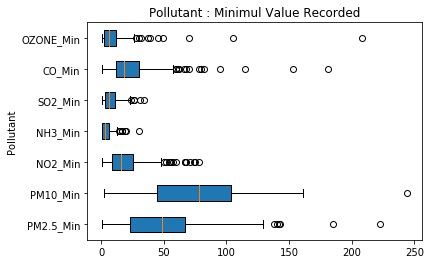

In [27]:
plt.boxplot(data_Min, vert=False, patch_artist=True, labels=[ x+'_Min' for x in labels]) 
plt.ylabel('Pollutant')
plt.title('Pollutant : Minimul Value Recorded')  
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


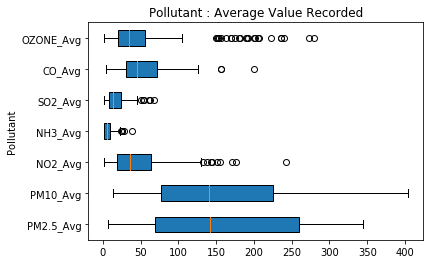

In [28]:
plt.boxplot(data_Avg, vert=False, patch_artist=True, labels=[x+'_Avg' for x in labels]) 
plt.ylabel('Pollutant')
plt.title('Pollutant : Average Value Recorded')  
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


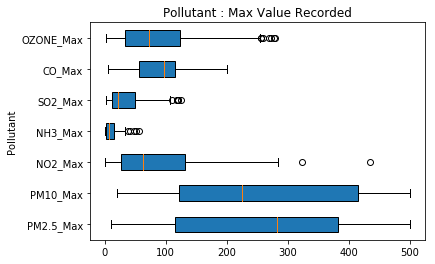

In [29]:
plt.boxplot(data_Max, vert=False, patch_artist=True, labels=[ x+'_Max' for x in labels]) 
plt.ylabel('Pollutant')
plt.title('Pollutant : Max Value Recorded')
plt.show()

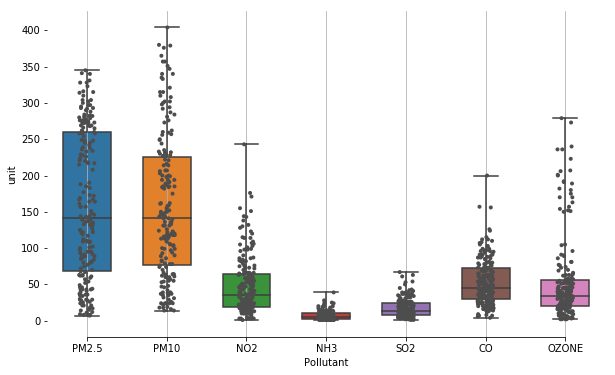

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="pollutant_id", y="pollutant_avg", data=cleanDf, whis=[0, 100], width=.6)

# Add in points to show each observation
sns.stripplot(x="pollutant_id", y="pollutant_avg", data=cleanDf,size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="unit")
ax.set(xlabel="Pollutant")
sns.despine(trim=True, left=True)